In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import wkt


In [3]:
data = pd.read_csv('calles_de_medellin_con_acoso.csv',sep=';')
data.isna().sum()

name              23559
origin                0
destination           0
length                0
oneway                0
harassmentRisk    16091
geometry              0
dtype: int64

In [4]:
data[data['harassmentRisk'].isna()]

,name,origin,destination,length,oneway,harassmentRisk,geometry
35,Calle 44,"(-75.5805063, 6.247958)","(-75.5790161, 6.2474342)",174.713,True,NaN,"LINESTRING (-75.5805063 6.247958, -75.57945580..."
39,Calle 30,"(-75.5902306, 6.2315159)","(-75.5893312, 6.2314641)",99.799,True,NaN,"LINESTRING (-75.5902306 6.2315159, -75.5901147..."
84,Acceso Pueblito Paisa,"(-75.5808252, 6.2339338)","(-75.5820215, 6.2354573)",225.159,False,NaN,"LINESTRING (-75.58082520000001 6.2339338, -75...."
85,Acceso Pueblito Paisa,"(-75.5808252, 6.2339338)","(-75.5802354, 6.2336293)",73.926,False,NaN,"LINESTRING (-75.58082520000001 6.2339338, -75...."
86,NaN,"(-75.5808252, 6.2339338)","(-75.5800098, 6.2382848)",888.930,False,NaN,"LINESTRING (-75.58082520000001 6.2339338, -75...."
...,...,...,...,...,...,...,...
68744,Medellín - San Jerónimo,"(-75.7086893, 6.3627057)","(-75.7088895, 6.3608552)",207.573,False,NaN,"LINESTRING (-75.7086893 6.3627057, -75.7087245..."
68745,NaN,"(-75.7086893, 6.3627057)","(-75.708837, 6.3625464)",24.181,False,NaN,"LINESTRING (-75.7086893 6.3627057, -75.7087739..."
68746,San Jerónimo-Medellín,"(-75.6909483, 6.338773)","(-75.6898219, 6.33719)",270.387,False,NaN,"LINESTRING (-75.6909483 6.338773, -75.6902973 ..."
68747,"['Medellín - San Jerónimo', 'San Jerónimo-Mede...","(-75.6909483, 6.338773)","(-75.7086472, 6.3610709)",3855.673,False,NaN,"LINESTRING (-75.6909483 6.338773, -75.6918575 ..."


In [5]:
data['harassmentRisk'].mean()

0.8435078086513182

In [6]:
data['harassmentRisk'].fillna(data['harassmentRisk'].mean(), inplace = True)

In [7]:
data.isna().sum()

name              23559
origin                0
destination           0
length                0
oneway                0
harassmentRisk        0
geometry              0
dtype: int64

In [8]:
data.head()

,name,origin,destination,length,oneway,harassmentRisk,geometry
0,Calle 10,"(-75.5728593, 6.2115169)","(-75.5724985, 6.2113756)",42.867,True,0.526539,"LINESTRING (-75.5728593 6.2115169, -75.5724984..."
1,Calle 10,"(-75.5705202, 6.2106275)","(-75.570427, 6.2105879)",11.204,True,0.414356,"LINESTRING (-75.5705202 6.2106275, -75.570427 ..."
2,Carrera 43A,"(-75.5705202, 6.2106275)","(-75.5705604, 6.2105262)",12.109,True,0.526539,"LINESTRING (-75.5705202 6.2106275, -75.5705604..."
3,Carrera 41,"(-75.5687719, 6.2099661)","(-75.5688022, 6.2098867)",9.443,True,0.302173,"LINESTRING (-75.5687719 6.2099661, -75.5688021..."
4,Calle 10,"(-75.5687719, 6.2099661)","(-75.568715, 6.2099443)",6.741,True,0.302173,"LINESTRING (-75.5687719 6.2099661, -75.568715 ..."


In [9]:
data['geometry'] = data['geometry'].apply(wkt.loads)
data = gpd.GeoDataFrame(data)

area = pd.read_csv('poligono_de_medellin.csv',sep=';')
area['geometry'] = area['geometry'].apply(wkt.loads)
area = gpd.GeoDataFrame(area)

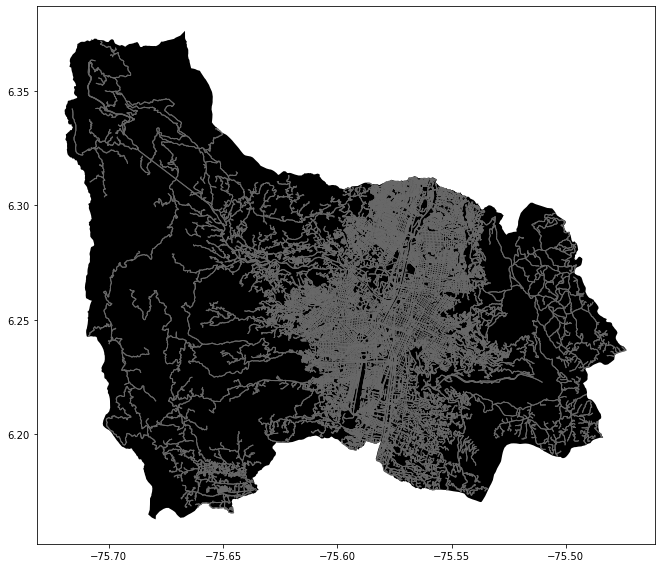

In [10]:
#Create plot
fig, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
area.plot(ax=ax, facecolor='black')

# Plot street data
data.plot(ax=ax, linewidth=1, edgecolor='dimgray')

plt.tight_layout()
plt.show()

In [11]:
data.columns

Index(['name', 'origin', 'destination', 'length', 'oneway', 'harassmentRisk',
       'geometry'],
      dtype='object')

In [12]:
nodos = data[['origin', 'destination', 'length', 'oneway']]
nodos.head()

,origin,destination,length,oneway
0,"(-75.5728593, 6.2115169)","(-75.5724985, 6.2113756)",42.867,True
1,"(-75.5705202, 6.2106275)","(-75.570427, 6.2105879)",11.204,True
2,"(-75.5705202, 6.2106275)","(-75.5705604, 6.2105262)",12.109,True
3,"(-75.5687719, 6.2099661)","(-75.5688022, 6.2098867)",9.443,True
4,"(-75.5687719, 6.2099661)","(-75.568715, 6.2099443)",6.741,True


In [9]:
data[data['name'] == 'Calle 10']

,name,origin,destination,length,oneway,harassmentRisk,geometry
0,Calle 10,"(-75.5728593, 6.2115169)","(-75.5724985, 6.2113756)",42.867,True,0.526539,"LINESTRING (-75.57286 6.21152, -75.57250 6.21138)"
1,Calle 10,"(-75.5705202, 6.2106275)","(-75.570427, 6.2105879)",11.204,True,0.414356,"LINESTRING (-75.57052 6.21063, -75.57043 6.21059)"
4,Calle 10,"(-75.5687719, 6.2099661)","(-75.568715, 6.2099443)",6.741,True,0.302173,"LINESTRING (-75.56877 6.20997, -75.56871 6.20994)"
5,Calle 10,"(-75.5674348, 6.2094357)","(-75.5673776, 6.2094125)",6.829,True,0.302173,"LINESTRING (-75.56743 6.20944, -75.56738 6.20941)"
6,Calle 10,"(-75.5666527, 6.2091202)","(-75.566565, 6.2090881)",10.331,True,0.302173,"LINESTRING (-75.56665 6.20912, -75.56656 6.20909)"
...,...,...,...,...,...,...,...
61399,Calle 10,"(-75.5597199, 6.2089413)","(-75.5597025, 6.2089442)",1.950,False,0.302173,"LINESTRING (-75.55972 6.20894, -75.55970 6.20894)"
61400,Calle 10,"(-75.5597199, 6.2089413)","(-75.5604701, 6.2088523)",83.535,False,0.302173,"LINESTRING (-75.55972 6.20894, -75.56008 6.208..."
62035,Calle 10,"(-75.5810225, 6.2144778)","(-75.5802552, 6.214197)",90.383,True,0.893225,"LINESTRING (-75.58102 6.21448, -75.58036 6.214..."
64991,Calle 10,"(-75.5775045, 6.2135995)","(-75.5787242, 6.2138248)",137.136,True,0.709882,"LINESTRING (-75.57750 6.21360, -75.57872 6.21382)"


In [10]:
data[data['origin'] == '(-75.5724985, 6.2113756)']

,name,origin,destination,length,oneway,harassmentRisk,geometry
7315,Carrera 43D,"(-75.5724985, 6.2113756)","(-75.5720978, 6.2122939)",111.304,True,0.526539,"LINESTRING (-75.57250 6.21138, -75.57210 6.21229)"
7316,Calle 10,"(-75.5724985, 6.2113756)","(-75.5719919, 6.2111787)",60.129,True,0.526539,"LINESTRING (-75.57250 6.21138, -75.57199 6.21118)"


In [56]:
prueba = data['origin'] == '(-75.5724985, 6.2113756)'
data.loc[prueba]

,name,origin,destination,length,oneway,harassmentRisk,geometry
7315,Carrera 43D,"(-75.5724985, 6.2113756)","(-75.5720978, 6.2122939)",111.304,True,0.526539,"LINESTRING (-75.57250 6.21138, -75.57210 6.21229)"
7316,Calle 10,"(-75.5724985, 6.2113756)","(-75.5719919, 6.2111787)",60.129,True,0.526539,"LINESTRING (-75.57250 6.21138, -75.57199 6.21118)"
